In [1]:
# 取得中文字型for juypter Notebook
import wget
f_url = 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'
wget.download(f_url)

# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 123

In [2]:
# 用於顯示混淆矩陣之函式
def make_cm(matrix, columns):  #matrix是矩陣的意思
    # matrix numpy 陣列
    
    # columns 項目名稱列表
    n = len(columns)
    
    # 將 '標準答案' 重複 n 次以生成列表
    act = ['標準答案'] * n
    pred = ['預測結果'] * n
    
    # 生成資料框
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

In [3]:
#1.載入資料
df_all = pd.read_csv('bank/bank-full.csv', sep=';')

#將項目名稱改成中文，確認資料框內容使用display(df_all.head())
columns = [
    '年齡', '職業', '婚姻', '學歷', '違約', '平均餘額', '房屋貸款', '個人信貸', '聯絡方式', '最近一次通話日期', '最近一次通話月份', '最近一次通話秒數', 
    '通話次數_促銷期間', '上次促銷後_經過天數', '通話次數_促銷之前', '上次促銷結果', '本次促銷結果'
]
df_all.columns = columns

#確認資料
display(df_all.head())


,年齡,職業,婚姻,學歷,違約,平均餘額,房屋貸款,個人信貸,聯絡方式,最近一次通話日期,最近一次通話月份,最近一次通話秒數,通話次數_促銷期間,上次促銷後_經過天數,通話次數_促銷之前,上次促銷結果,本次促銷結果
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#2.確認資料
df_all.info()

#本次促銷結果的成功分布
print(df_all['本次促銷結果'].value_counts())

#成功率
rate = df_all['本次促銷結果'].value_counts()['yes'] / len(df_all)
print(f'本次促銷結果成功率: {rate:.4f}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   年齡          45211 non-null  int64 
 1   職業          45211 non-null  object
 2   婚姻          45211 non-null  object
 3   學歷          45211 non-null  object
 4   違約          45211 non-null  object
 5   平均餘額        45211 non-null  int64 
 6   房屋貸款        45211 non-null  object
 7   個人信貸        45211 non-null  object
 8   聯絡方式        45211 non-null  object
 9   最近一次通話日期    45211 non-null  int64 
 10  最近一次通話月份    45211 non-null  object
 11  最近一次通話秒數    45211 non-null  int64 
 12  通話次數_促銷期間   45211 non-null  int64 
 13  上次促銷後_經過天數  45211 non-null  int64 
 14  通話次數_促銷之前   45211 non-null  int64 
 15  上次促銷結果      45211 non-null  object
 16  本次促銷結果      45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
本次促銷結果
no     39922
yes     5289
Name: count, dtype: int64
本次促銷結果成功率: 0.1170


In [5]:
#3.預處理資料
#確認遺失值
print(df_all.isnull().sum())  #也可以用display()顯示耶

#確認需要被One-Hot的cloumns有哪些
#'職業','婚姻','學歷','聯絡方式','上次促銷結果'
#設置One-Hot函式
def enc(df, column:str):
    df_dummy = pd.get_dummies(df[column], prefix=column, dtype=int)  #要加上dtype才會顯示0、1
    df = pd.concat([df.drop([column],axis=1), df_dummy],axis=1)
    return df

df_all2 = df_all.copy()
df_all2 = enc(df_all2, '職業')
df_all2 = enc(df_all2, '婚姻')
df_all2 = enc(df_all2, '學歷')
df_all2 = enc(df_all2, '聯絡方式')
df_all2 = enc(df_all2, '上次促銷結果')

display(df_all2.head())

年齡            0
職業            0
婚姻            0
學歷            0
違約            0
平均餘額          0
房屋貸款          0
個人信貸          0
聯絡方式          0
最近一次通話日期      0
最近一次通話月份      0
最近一次通話秒數      0
通話次數_促銷期間     0
上次促銷後_經過天數    0
通話次數_促銷之前     0
上次促銷結果        0
本次促銷結果        0
dtype: int64


,年齡,違約,平均餘額,房屋貸款,個人信貸,最近一次通話日期,最近一次通話月份,最近一次通話秒數,通話次數_促銷期間,上次促銷後_經過天數,通話次數_促銷之前,本次促銷結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,學歷_primary,學歷_secondary,學歷_tertiary,學歷_unknown,聯絡方式_cellular,聯絡方式_telephone,聯絡方式_unknown,上次促銷結果_failure,上次促銷結果_other,上次促銷結果_success,上次促銷結果_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [6]:
#以0、1替換yes、no(映射/編碼)
def enc_bin(df, column):
    df[column] = df[column].map(dict(yes=1, no=0))  #series.map()把舊值換成新值,通常是用dict字典
    return df

#需要更換的值'違約','房屋貸款','個人信貸','本次促銷結果'
df_all2 = enc_bin(df_all2, '違約')
df_all2 = enc_bin(df_all2, '房屋貸款')
df_all2 = enc_bin(df_all2, '個人信貸')
df_all2 = enc_bin(df_all2, '本次促銷結果')

display(df_all2.head())

,年齡,違約,平均餘額,房屋貸款,個人信貸,最近一次通話日期,最近一次通話月份,最近一次通話秒數,通話次數_促銷期間,上次促銷後_經過天數,通話次數_促銷之前,本次促銷結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,學歷_primary,學歷_secondary,學歷_tertiary,學歷_unknown,聯絡方式_cellular,聯絡方式_telephone,聯絡方式_unknown,上次促銷結果_failure,上次促銷結果_other,上次促銷結果_success,上次促銷結果_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [7]:
#將月份改為數值使用1~12編碼即可

month_dict = dict(jan=1, feb=2, mar=3, apr=4, 
    may=5, jun=6, jul=7, aug=8, sep=9, oct=10, 
    nov=11, dec=12)

def nce_month(df, column):
    df[column] = df[column].map(month_dict)
    return df

df_all2 = nce_month(df_all2, '最近一次通話月份')

display(df_all2.head())

,年齡,違約,平均餘額,房屋貸款,個人信貸,最近一次通話日期,最近一次通話月份,最近一次通話秒數,通話次數_促銷期間,上次促銷後_經過天數,通話次數_促銷之前,本次促銷結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,學歷_primary,學歷_secondary,學歷_tertiary,學歷_unknown,聯絡方式_cellular,聯絡方式_telephone,聯絡方式_unknown,上次促銷結果_failure,上次促銷結果_other,上次促銷結果_success,上次促銷結果_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


concat()說明書
pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
objs：一個可迭代物件（list、tuple）包含要連接的 DataFrame 或 Series。
axis：連接軸，0 表示縱向（行連接，預設），1 表示橫向（列連接）。
join：如何處理索引的聯集。'outer'（預設）為聯集，'inner'為交集。
ignore_index：是否重新索引結果，若True，結果索引將會從0開始。
keys：為連接的資料添加層次化索引標籤。
verify_integrity：是否檢查索引有無重複。
sort：是否排序非連接軸的索引。

資料處理Label encoding或One hot encoding
get_dummies()說明書
pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, drop_first=False, dtype=None)
data：欲處理的DataFrame或Series。
columns：選擇指定的欄位進行轉換，不指定則會對所有類別型欄位處理。
prefix：轉換後欄位名前綴，預設用原本欄位名。
prefix_sep：前綴與欄位值間隔符號（預設為 _）。
drop_first：是否刪除第一個類別，避免虛擬變數陷阱（可用於避免多重共線性）。
dummy_na：是否當成一類別值對待空值。
dtype：轉換後的資料型態。

In [8]:
#4.分割(split)資料
x = df_all2.drop('本次促銷結果', axis=1)
y = df_all2['本次促銷結果'].values

#分割成訓練集與驗證集，使用6:4分配
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=random_seed, stratify=y)

In [9]:
#5.選擇演算法(algorithm)

#邏輯斯回歸
from sklearn.linear_model import LogisticRegression
algorithm1 = LogisticRegression(random_state=random_seed)

#決策樹
from sklearn.tree import DecisionTreeClassifier
algorithm2 = DecisionTreeClassifier(random_state=random_seed)

#隨機森林
from sklearn.ensemble import RandomForestClassifier
algorithm3 = RandomForestClassifier(random_state=random_seed)

#XGBoost
from xgboost import XGBClassifier
algorithm4 = XGBClassifier(random_state=random_seed)

#組成一個list
algorithms = [algorithm1,  algorithm2, algorithm3, algorithm4]

In [10]:
#交叉驗證選擇最佳演算法
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
    # loop進行交叉驗證
    scores = cross_val_score(algorithm , x_train, y_train, cv=stratifiedkfold, scoring='roc_auc')
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'平均分數: {score:.4f}, 個別分數:{scores} 演算法:{name}')

平均分數: 0.8330, 個別分數:[0.8292 0.8287 0.8412] 演算法:LogisticRegression
平均分數: 0.6958, 個別分數:[0.6917 0.7023 0.6935] 演算法:DecisionTreeClassifier
平均分數: 0.9200, 個別分數:[0.9259 0.9196 0.9145] 演算法:RandomForestClassifier
平均分數: 0.9244, 個別分數:[0.9253 0.926  0.922 ] 演算法:XGBClassifier


In [11]:
#6~7訓練、預測
#因為XGBoost表現最好所以選擇他
algorithm = XGBClassifier(random_state=random_seed)

#訓練
algorithm.fit(x_train, y_train)

#預測
y_pred = algorithm.predict(x_test)

In [12]:
#8.評估
#輸出混淆矩陣
from sklearn.metrics import confusion_matrix
df_metrix = make_cm(confusion_matrix(y_test, y_pred),['失敗', '成功'])
display(df_metrix)

#計算精確性、召回率、F分數
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'精確性: {precision:.4f} 召回率:{recall:.14f} F分數:{fscore:.4f}')

預測結果      
            失敗    成功
標準答案 失敗  15389   580
     成功   1096  1020

精確性: 0.6375 召回率:0.48204158790170 F分數:0.5490


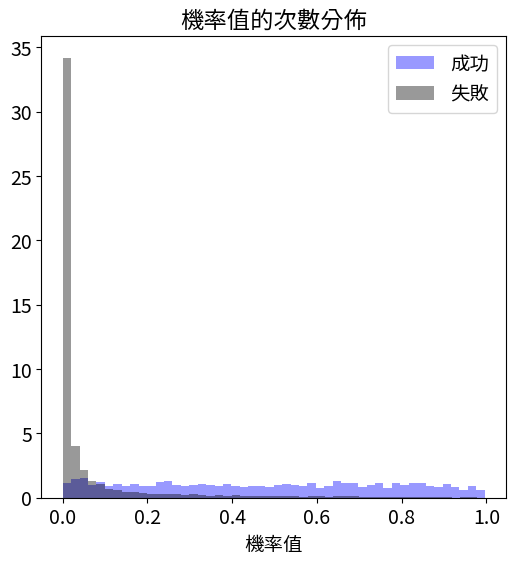

In [13]:
#機率值的次數分配圖
import seaborn as sns

#取得y=1的機率值
y_proba1 = algorithm.predict_proba(x_test)[:,1]

#將資料進行分割
y0 = y_proba1[y_test==0]
y1 = y_proba1[y_test==1]

#繪製散佈圖
plt.figure(figsize=(6,6))
plt.title('機率值的次數分佈')
sns.distplot(y1, kde=False, norm_hist=True, bins=50, color='b', label='成功')
sns.distplot(y0, kde=False, norm_hist=True, bins=50, color='k', label='失敗')
plt.xlabel('機率值')
plt.legend()
plt.show()

In [14]:
#定義可以改變閾值的測試函式
def pred(algorithm, x, thres):
    #取得機率值(矩陣)
    y_proba = algorithm.predict_proba(x)
    #預測結果為1的機率值
    y_proba1 = y_proba[:,1]
    #預測結果為1的機率值>閾值
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

In [15]:
#以0.05為間距逐次改變閾值，並計算精確性、召回率、F分數

thres_list = np.arange(0.5, 0, -0.05)

for thres in thres_list:
    y_pred = pred(algorithm, x_test, thres)
    pred_sum = y_pred.sum()
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f'閾值: {thres:.2f} 陽性預測數: {pred_sum} \n精確性: {precision:.4f} 召回率: {recall:.4f} F分數: {fscore:.4f}')

閾值: 0.50 陽性預測數: 1600 
精確性: 0.6375 召回率: 0.4820 F分數: 0.5490
閾值: 0.45 陽性預測數: 1788 
精確性: 0.6208 召回率: 0.5246 F分數: 0.5686
閾值: 0.40 陽性預測數: 2023 
精確性: 0.5981 召回率: 0.5718 F分數: 0.5847
閾值: 0.35 陽性預測數: 2254 
精確性: 0.5830 召回率: 0.6210 F分數: 0.6014
閾值: 0.30 陽性預測數: 2533 
精確性: 0.5618 召回率: 0.6725 F分數: 0.6122
閾值: 0.25 陽性預測數: 2842 
精確性: 0.5355 召回率: 0.7193 F分數: 0.6140
閾值: 0.20 陽性預測數: 3190 
精確性: 0.5157 召回率: 0.7774 F分數: 0.6201
閾值: 0.15 陽性預測數: 3625 
精確性: 0.4836 召回率: 0.8284 F分數: 0.6107
閾值: 0.10 陽性預測數: 4198 
精確性: 0.4409 召回率: 0.8748 F分數: 0.5863
閾值: 0.05 陽性預測數: 5391 
精確性: 0.3662 召回率: 0.9329 F分數: 0.5259


In [16]:
#以F分數最高為準，重新生成閾值為0.20的混淆矩陣預測

y_final = pred(algorithm, x_test, 0.20)
#輸出混淆矩陣
df_metrix2 = make_cm(confusion_matrix(y_test, y_final), ['失敗', '成功'])
display(df_metrix2)

#計算precision、recall、fscore
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_final, average='binary')
print(f'精確性: {precision:.4f} 召回率: {recall:.4f} F分數: {fscore:.4f}')

預測結果      
            失敗    成功
標準答案 失敗  14424  1545
     成功    471  1645

精確性: 0.5157 召回率: 0.7774 F分數: 0.6201


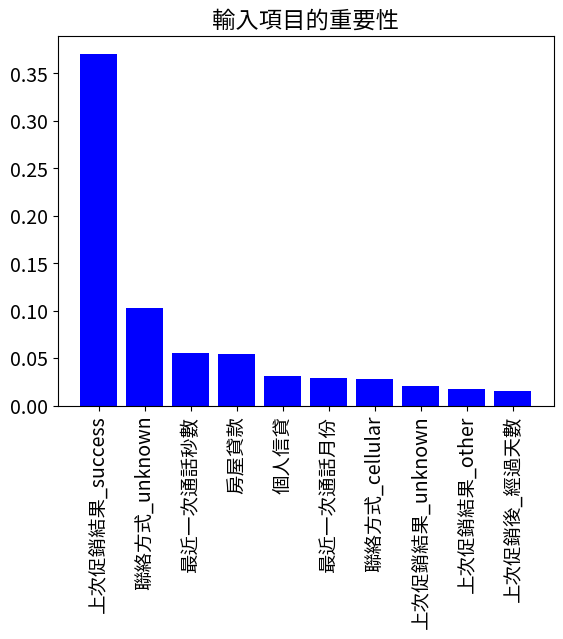

In [17]:
#重要性分析
#取得重要性向量
importances = algorithm.feature_importances_
#以項目名稱為鍵，生成series
w = pd.Series(importances, index=x.columns)
#按值的大小排序
u = w.sort_values(ascending=False)
#指提取前10個
v = u[:10]
#繪製重要性的直方圖
plt.title('輸入項目的重要性')
plt.bar(range(len(v)), v, color='b', align='center')
plt.xticks(range(len(v)),v.index, rotation=90)
plt.show()

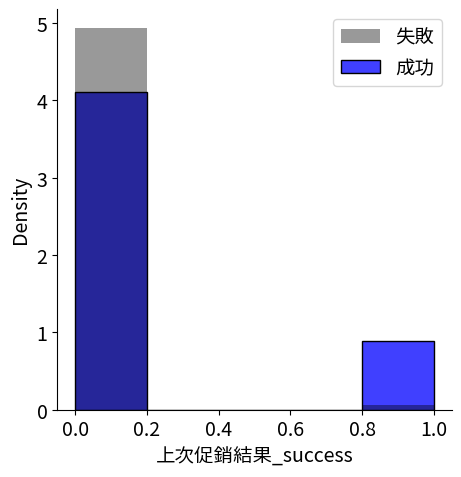

In [ ]:
column = '上次促銷結果_success'

sns.displot(x_test[y_test==1][column], kde=False, stat='density', bins=5, color='b', label='成功') #新的寫法displot() or histplot()
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True, bins=5, color='k', label='失敗') #distplot()已被棄用

plt.legend()
plt.show()  #下圖density是密度的意思

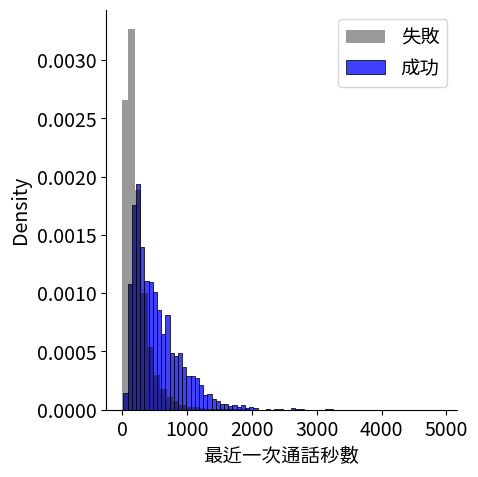

In [35]:
column = '最近一次通話秒數'

sns.displot(x_test[y_test==1][column], kde=False, stat='density', bins=50, color='b', label='成功') #新的寫法displot() or histplot()
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True, bins=50, color='k', label='失敗') #distplot()已被棄用

plt.legend()
plt.show() 

In [31]:
display(df_all2.head())

,年齡,違約,平均餘額,房屋貸款,個人信貸,最近一次通話日期,最近一次通話月份,最近一次通話秒數,通話次數_促銷期間,上次促銷後_經過天數,通話次數_促銷之前,本次促銷結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,學歷_primary,學歷_secondary,學歷_tertiary,學歷_unknown,聯絡方式_cellular,聯絡方式_telephone,聯絡方式_unknown,上次促銷結果_failure,上次促銷結果_other,上次促銷結果_success,上次促銷結果_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


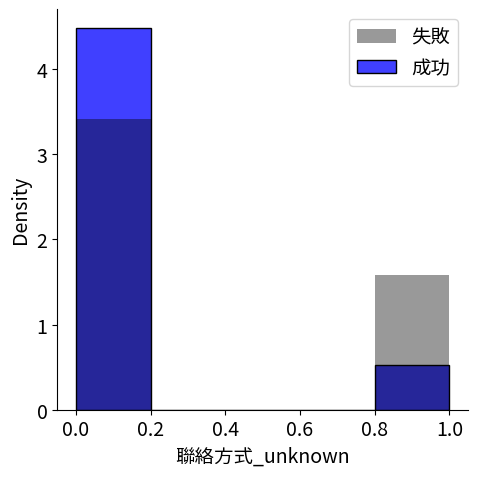

In [ ]:
column = '聯絡方式_unknown'

sns.displot(x_test[y_test==1][column], kde=False, stat='density', bins=5, color='b', label='成功') #新的寫法displot() or histplot()
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True, bins=5, color='k', label='失敗') #distplot()已被棄用

plt.legend()
plt.show() 

In [36]:
df_all2.columns

Index(['年齡', '違約', '平均餘額', '房屋貸款', '個人信貸', '最近一次通話日期', '最近一次通話月份', '最近一次通話秒數',
       '通話次數_促銷期間', '上次促銷後_經過天數', '通話次數_促銷之前', '本次促銷結果', '職業_admin.',
       '職業_blue-collar', '職業_entrepreneur', '職業_housemaid', '職業_management',
       '職業_retired', '職業_self-employed', '職業_services', '職業_student',
       '職業_technician', '職業_unemployed', '職業_unknown', '婚姻_divorced',
       '婚姻_married', '婚姻_single', '學歷_primary', '學歷_secondary', '學歷_tertiary',
       '學歷_unknown', '聯絡方式_cellular', '聯絡方式_telephone', '聯絡方式_unknown',
       '上次促銷結果_failure', '上次促銷結果_other', '上次促銷結果_success', '上次促銷結果_unknown'],
      dtype='object')

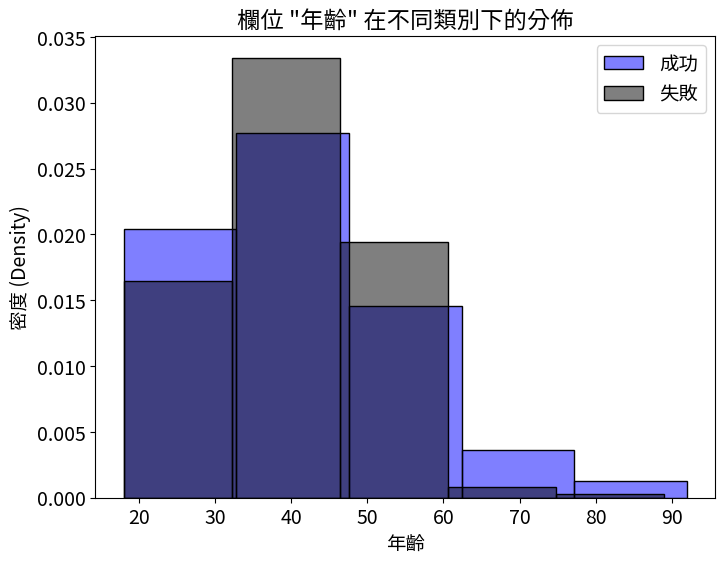

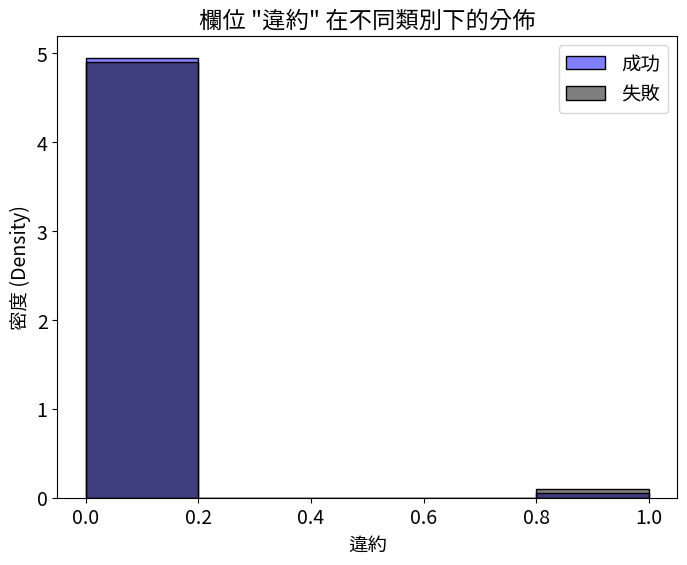

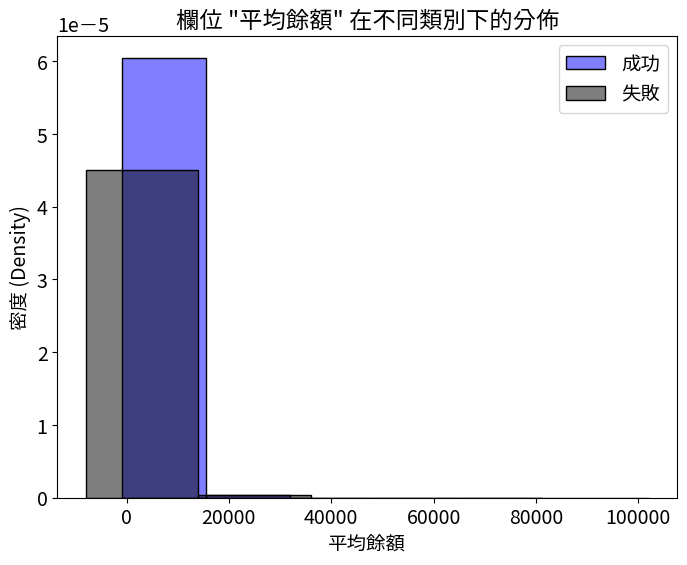

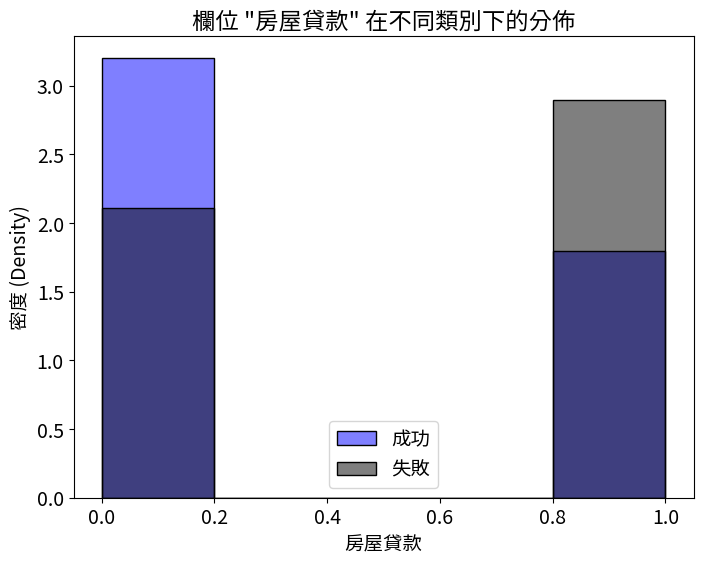

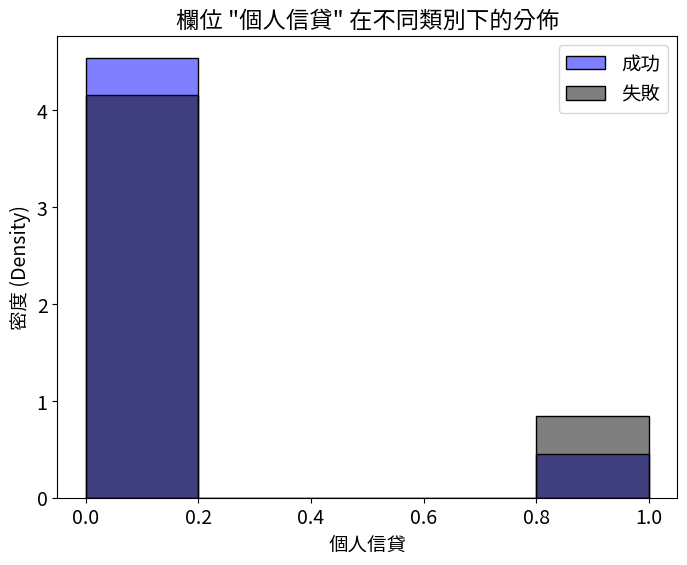

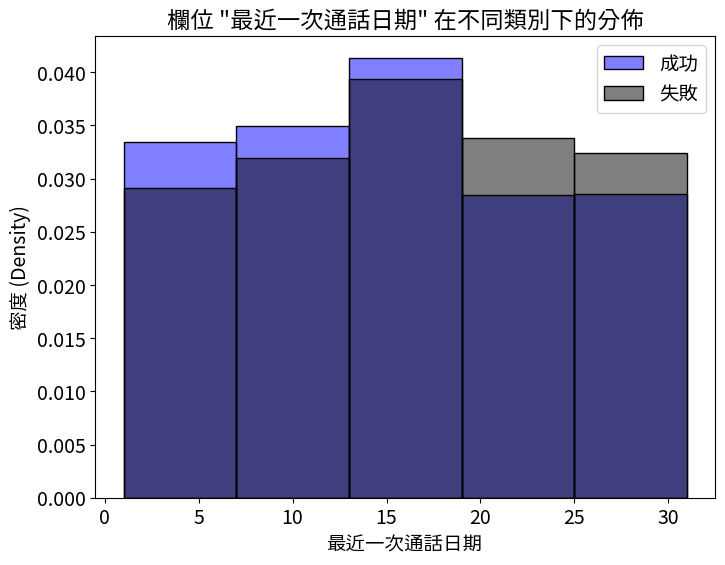

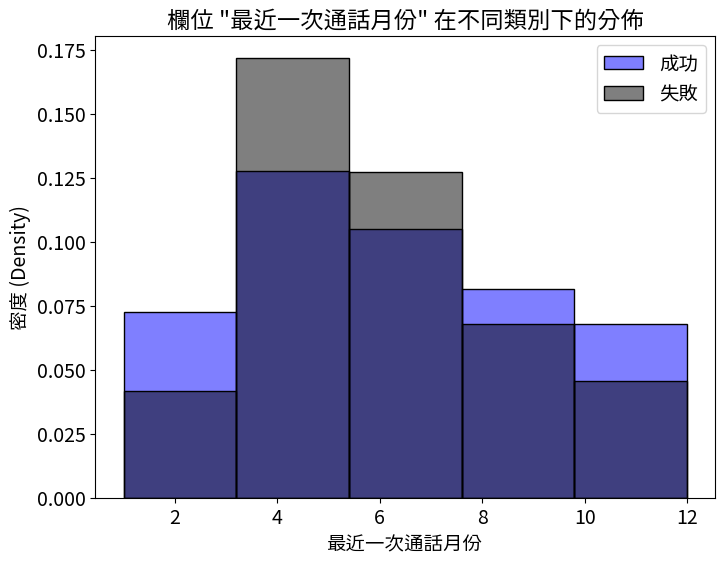

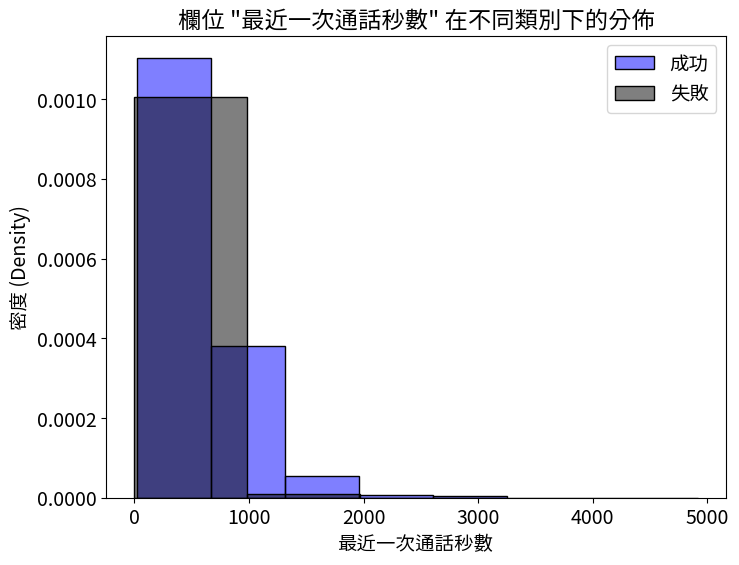

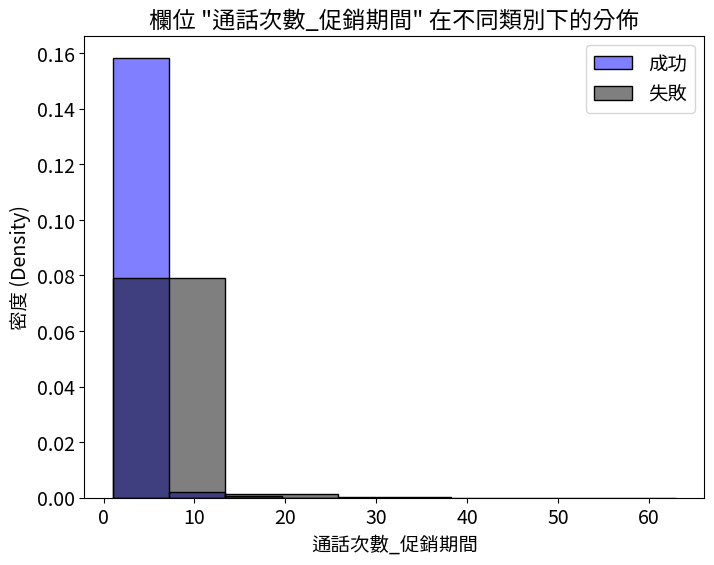

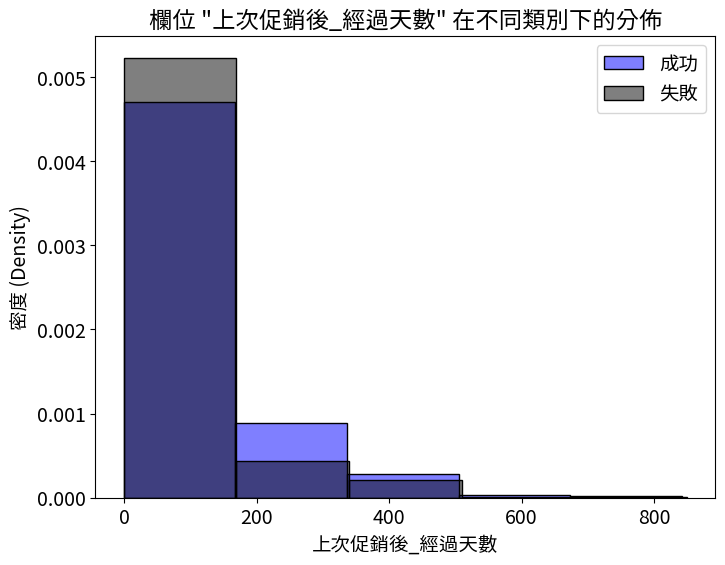

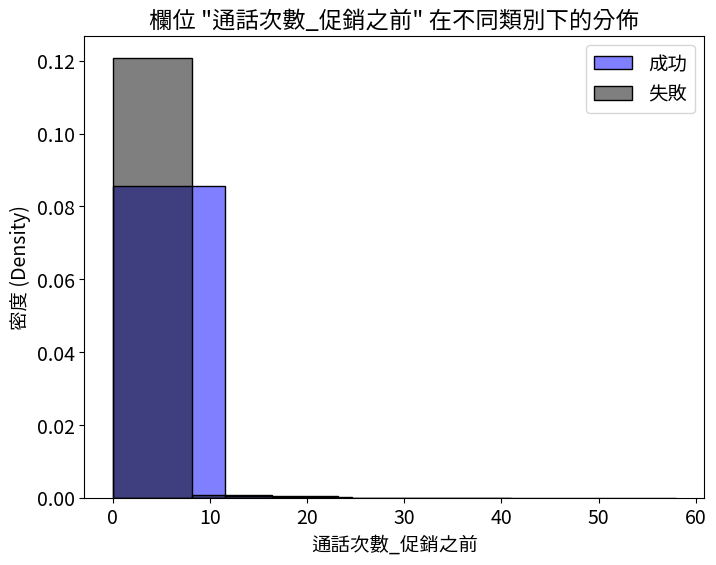

KeyError: '本次促銷結果'

<Figure size 800x600 with 0 Axes>

In [37]:
# 確保 column 變數名稱是正確的，這裡假設您修正為 'column'
# 確保 x_test, y_test, df_all2 這些變數都已經定義和載入

for column in df_all2.columns:
    # --- 1. 設定新的圖表 ---
    # 創建一個新的圖表空間，讓每張圖獨立顯示
    plt.figure(figsize=(8, 6))
    
    # --- 2. 繪製 y=1 的分佈 (成功/正類) ---
    # 使用 histplot 繪製第一個分佈
    sns.histplot(
        x_test[y_test==1][column], 
        stat='density', # 替代舊版的 norm_hist=True
        bins=5, 
        color='b', 
        label='成功', 
        alpha=0.5 # 建議加入 alpha 讓重疊分佈可見
    )
    
    # --- 3. 繪製 y=0 的分佈 (失敗/負類) ---
    # 在同一個座標軸上疊加繪製第二個分佈
    sns.histplot(
        x_test[y_test==0][column], 
        stat='density', # 替代舊版的 norm_hist=True
        bins=5, 
        color='k', 
        label='失敗',
        alpha=0.5
    )

    # --- 4. 圖表美化與輸出 ---
    plt.title(f'欄位 "{column}" 在不同類別下的分佈')
    plt.xlabel(column) # X 軸標籤
    plt.ylabel('密度 (Density)') # Y 軸標籤
    plt.legend()
    plt.show()